# Seattle Salary Breakdown

In [1]:
# Data sourced from -- https://data.seattle.gov/
# URL - https://data.seattle.gov/City-Business/City-of-Seattle-Wage-Data/2khk-5ukd

## Imports

##### Import dependencies (Python Libraries)

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

##### Read in the dataset

In [2]:
wages = pd.read_csv('Seattle_Wages_Data.csv')

## Descriptive Stats

##### Run basics descriptive statistics -- use the following methods:
##### 1. shape, 2. describe, 3. info, 4. columns

In [3]:
wages.shape

(12346, 5)

In [4]:
wages.describe()

,Hourly Rate
count,12346.000000
mean,38.974306
std,13.724498
min,5.110000
25%,28.830000
50%,38.850000
75%,48.430000
max,166.910000


In [5]:
wages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12346 entries, 0 to 12345
Data columns (total 5 columns):
Department      12346 non-null object
Last Name       12346 non-null object
First Name      12346 non-null object
Job Title       12346 non-null object
Hourly Rate     12346 non-null float64
dtypes: float64(1), object(4)
memory usage: 482.3+ KB


In [6]:
wages.columns

Index(['Department', 'Last Name', 'First Name', 'Job Title', 'Hourly Rate '], dtype='object')

##### Let's visualize our dataset -- use the following methods:
##### 1. head, 2. tail

In [7]:
wages.head()

,Department,Last Name,First Name,Job Title,Hourly Rate
0,Arts and Culture,Boas-Du Pree,Sandra,Admin Staff Asst,34.48
1,Arts and Culture,Bolisay,Ronald,Publc Relations Spec,29.09
2,Arts and Culture,Chai,Grace,Cooperative Intern *,16.12
3,Arts and Culture,Childers,Calandra,"StratAdvsr3,Exempt",48.71
4,Arts and Culture,Crooks,Jennifer,Arts Prgm Spec,35.93


In [8]:
wages.tail()

,Department,Last Name,First Name,Job Title,Hourly Rate
12341,Seattle Public Utilities,Zemmerman,Ahanu,Maint Laborer,25.39
12342,Seattle Public Utilities,Zoellmer,Adam,"Trng&Ed Coord,Sr",37.94
12343,Seattle Public Utilities,Zollman,Karen,"Civil Engrng Spec,Sr",48.84
12344,Seattle Public Utilities,Zurowski,Allan,Carpenter,32.88
12345,Seattle Public Utilities,Zuver,Glen,"Constr&Maint Equip Op,Sr",34.75


## Indexing

### Question -- Who earns the most per hour?

##### Index for the Hour Rate column and find the max. Save the output to a variable.

In [10]:
highest_wage = wages['Hourly Rate '].max()

##### Let's try boolean indexing

In [11]:
wages[wages['Hourly Rate '] == highest_wage]

,Department,Last Name,First Name,Job Title,Hourly Rate
1879,City Light,Weis,Larry,City Light General Mgr&CEO,166.91


### Question -- How many people work for City Light?

##### Use boolean indexing to find all employees that work for City Light. Save that output (dataframe) to a variable called 'City_Light_employees'.

In [12]:
City_Light_employees = wages[wages['Department'] == 'City Light']

##### Apply the describe method to the DataFrame -- 'City_Lights_employees'. Index on 'Job Title'

In [13]:
City_Light_employees['Job Title'].describe()

count      1850
unique      328
top       Lnwkr
freq        118
Name: Job Title, dtype: object

### Question -- What is the average hourly salary earned at City Light?

##### From the 'City_Light_employees' DataFrame index on 'Hourly Rate '. Apply the method -- mean() to find the average salary. Save that output to a variable called -- 'avg_City_Light_rate'

In [14]:
avg_City_Light_rate = City_Light_employees['Hourly Rate '].mean()

### Question -- How much more does the highest earning gov worker earn than the average City Light employee?

In [15]:
highest_wage - avg_City_Light_rate

124.4593027027027

### Question -- How many other departments are there?

##### From the wages DataFrame index on 'Departments'. Apply the method -- describe().

In [16]:
wages['Department'].describe()

count                 12346
unique                   36
top       Police Department
freq                   1966
Name: Department, dtype: object

### Question -- How many positions are there in the Police Department? Which one earned the most and the least?

##### From the wages DataFrame boolean index on 'Police Department'. Save the output to a variable called -- 'Police_Dept_employees'

In [17]:
Police_Dept_employees = wages[wages['Department'] == 'Police Department']

#####  From the 'Police_Dept_employees' DataFrame, index on 'Job Title'. Use the describe method to get descriptive stats on the column, including how many unique values were there. 

In [18]:
Police_Dept_employees['Job Title'].describe()

count               1966
unique               127
top       Pol Ofcr-Patrl
freq                 498
Name: Job Title, dtype: object

##### From the 'Police_Dept_employees' DataFrame index on the 'Hourly Rate ' column and apply the describe method.

In [19]:
Police_Dept_employees['Hourly Rate '].describe()

count    1966.000000
mean       43.954639
std        11.697764
min        16.120000
25%        35.560000
50%        44.950000
75%        49.510000
max       127.680000
Name: Hourly Rate , dtype: float64

##### From the 'Police_Dept_employees' DataFrame, use boolean indexing to find who is earning the most money at the Police Department

In [20]:
Police_Dept_employees[Police_Dept_employees['Hourly Rate '] == 127.680000]

,Department,Last Name,First Name,Job Title,Hourly Rate
7486,Police Department,OToole,Kathleen,Seattle Police Chief,127.68


##### From the 'Police_Dept_employees' DataFrame, use boolean indexing to find who is earning the least money at the Police Department

In [21]:
Police_Dept_employees[Police_Dept_employees['Hourly Rate '] == 16.120000]

,Department,Last Name,First Name,Job Title,Hourly Rate
6192,Police Department,Bani Yaseen,Aissar,Cooperative Intern *,16.12


## Pivot Tables

##### Generate a pivot table -- index on Department and Job Title, use Hourly Rate for the value(s). Save pivot table to varaible called 'wages_pivot'

In [22]:
wages_pivot = pd.pivot_table(wages, index = ['Department', 'Job Title'], values = ['Hourly Rate '])

##### Index the pivot table for jobs and the hourly rates in the Arts and Culture department. Save the output to a variable.

In [ ]:
wages_pivot[wages_pivot.index.get_level_values('Department') == 'Arts and Culture']

In [23]:
ArtsAndCulture = wages_pivot[wages_pivot.index.get_level_values('Department') == 'Arts and Culture']

In [24]:
ArtsAndCulture

Hourly Rate 
Department       Job Title                             
Arts and Culture Accountant,Sr                39.960000
                 Actg Tech III                29.090000
                 Admin Spec III               26.076667
                 Admin Staff Anlyst           35.160000
                 Admin Staff Asst             32.030000
                 Arts Conserv Tech            30.170000
                 Arts Prgm Spec               34.930000
                 Arts Prgm Spec,Sr            39.095000
                 Arts Prgm Supv               44.230000
                 Cooperative Intern *         16.120000
                 Events Booking Rep           31.310000
                 Executive2                   62.590000
                 Maint Laborer                25.390000
                 Manager1,Exempt              55.570000
                 Publc Relations Spec         29.090000
                 Publc Relations Spec,Sr      35.160000
                 Stage Tech,Lead              32.810000
                 StratAdvsr1,Exempt           43.616667
                 StratAdvsr1,General Govt     39.290000
                 StratAdvsr2,Exempt           57.790000
                 StratAdvsr3,Exempt           48.710000

##### Index the pivot table for jobs and the hourly rates in the City Light department. Save the output to a variable.

In [25]:
CityLight = wages_pivot[wages_pivot.index.get_level_values('Department') == 'City Light']

In [26]:
CityLight

Hourly Rate 
Department Job Title                                
City Light Accountant                      33.118571
           Accountant,Prin                 44.343333
           Accountant,Prin *               39.960000
           Accountant,Sr                   38.921250
           Actg Tech I-BU                  24.500000
           Actg Tech II-BU                 26.318710
           Actg Tech II-BU *               24.127143
           Actg Tech III-BU                28.905556
           Actg Tech III-BU *              26.890000
           Actg Tech Supv-BU               30.930000
           Admin Spec I                    24.500000
           Admin Spec I *                  21.990000
           Admin Spec I-BU                 24.500000
           Admin Spec I-BU *               22.770000
           Admin Spec II                   24.500000
           Admin Spec II *                 23.630000
           Admin Spec II-BU                26.176364
           Admin Spec II-BU *              23.978000
           Admin Spec III                  27.980000
           Admin Spec III-BU               28.156667
           Admin Staff Anlyst              39.400000
           Admin Staff Asst                33.215000
           Admin Staff Asst *              31.930000
           Admin Support Supv-BU           30.170000
           Apprenticeship Coord            36.580000
           Arboriculturist                 33.820000
           Asst To The General Mgr&CEO     40.160000
           Auto Engr,Sr                    42.560000
           Auto Maint CC                   40.860000
           Auto Mechanic                   34.930000
...                                              ...
           StratAdvsr3,Info Technol-BU     58.320000
           StratAdvsr3,PC&RM-BU            63.780000
           StratAdvsr3,Utils               59.480000
           StratAdvsr3,Utils-BU            61.095000
           Strucl Iron Wkr                 44.920000
           Strucl Iron Wkr *               44.920000
           Strucl Iron Wkr CC              50.540000
           Strucl Pntr                     34.020000
           Strucl Pntr CC                  38.300000
           Student Accountant *            20.920000
           Student Accountant Intern *     20.920000
           Student Engr *                  20.690000
           Student Engr Intern *           20.770000
           Technicial Writer               31.250000
           Trans Line CC                   52.060000
           Trng&Ed Coord                   36.580000
           Trng&Ed Coord,Sr                38.426667
           Truck Drvr                      29.940000
           Truck Drvr,Heavy                31.480000
           Util Acts Supv                  35.160000
           Util Constr Lead Wkr            31.200000
           Util Constr Wkr                 28.711600
           Util Hearing Ofcr *             39.400000
           Util Laborer                    24.500000
           Video Spec II *                 33.830000
           Warehouser,Chief                33.530000
           Warehouser,Sr-BU                28.683333
           Warehouser,Sr-BU *              28.770000
           Warehouser-BU                   26.069286
           Warehouser-BU *                 24.190000

[328 rows x 1 columns]

## Graphing

##### How many people work in the Arts and Culture department?

In [29]:
ArtsAndCulture['Hourly Rate '].count()

21

##### Generate a histgram of the wages of employees in the Arts and Culture department.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e164e80>]],
      dtype=object)

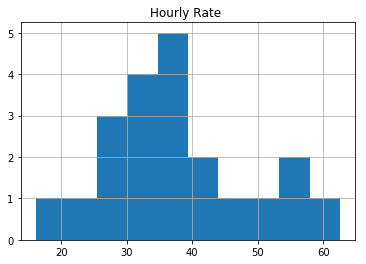

In [32]:
ArtsAndCulture.hist()

##### How many people work in the City Light department?

In [33]:
CityLight['Hourly Rate '].count()

328

##### Generate a histgram of the wages of employees in the City Light department.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e25cf98>]],
      dtype=object)

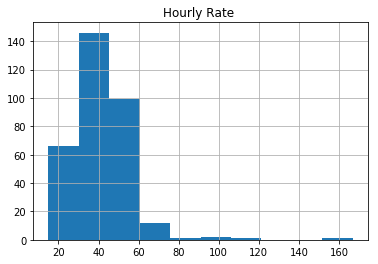

In [34]:
CityLight.hist()

## Exporting

##### Find the present working directory.

In [1]:
pwd

'/Users/danishmehboob/Desktop/UW_workshop/Day II'

##### Export the data in an excel file. The file will be saved in the present working directory.

In [ ]:
CityLight.to_excel('PythonPandasOutput.xlsx', sheet_name='Analysis')